## Deep Unsupervised Learning using Nonequilibrium Thermodynamics

In [ ]:
'''
    @article{DBLP:journals/corr/Sohl-DicksteinW15,
    author       = {Jascha Sohl{-}Dickstein and
                    Eric A. Weiss and
                    Niru Maheswaranathan and
                    Surya Ganguli},
    title        = {Deep Unsupervised Learning using Nonequilibrium Thermodynamics},
    journal      = {CoRR},
    volume       = {abs/1503.03585},
    year         = {2015},
    url          = {http://arxiv.org/abs/1503.03585},
    eprinttype    = {arXiv},
    eprint       = {1503.03585},
    timestamp    = {Mon, 13 Aug 2018 16:47:30 +0200},
    biburl       = {https://dblp.org/rec/journals/corr/Sohl-DicksteinW15.bib},
    bibsource    = {dblp computer science bibliography, https://dblp.org}
    }
'''

This notebook is used for practicing the diffusion process based on the idea inspired by non-equilibrium statistical physics.

1. An iterative forward diffusion process: Systematically and slowly destroy structure in a data distribution. 
2. A reverse diffusion process: Restores structure in data, yielding a highly flexible and tractable generative model of the data

This approach allows us to rapidly learn, sample from, and evaluate probabilities in deep generative models with thousands of layers or time steps, as well as to compute conditional and posterior probabilities under the learned mode

=================================================

### Data preparation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

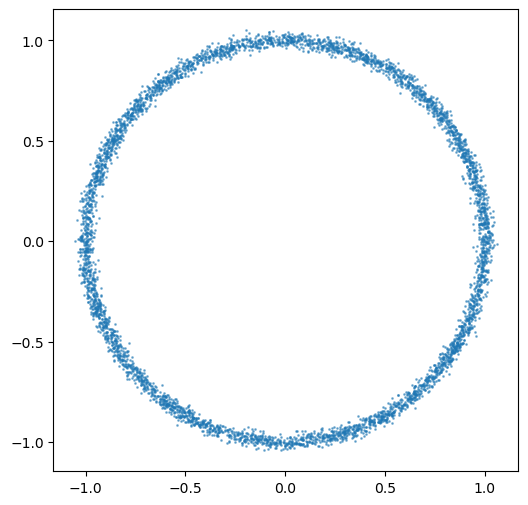

In [48]:
# Circle data
n = 5000
m = 5000
r = 1 + 0.02 * np.random.randn(m)
#r = 1
theta = 2 * np.pi * np.random.rand(n)
x = r * np.cos(theta)
y = r * np.sin(theta)
x0 = np.vstack((x, y)).T
plt.figure(figsize=(6,6))
plt.scatter(x, y, alpha=0.5, s=1)

In [49]:
# set diffusion steps and beta schedule
T = 50
beta = np.linspace(1e-4, 0.02, T)
alpha = 1 - beta
alpha_bar = np.cumprod(alpha)

In [ ]:
from matplotlib.animation import FuncAnimation
# while loop for forward diffusion process. Show a gif for this process
t = 0
x_t = x0
while t < T:
    eps = np.random.randn(*x_t.shape)
    x_t = np.sqrt(alpha[t]) * x_t + np.sqrt(1 - alpha[t]) * eps
    t += 1
    # Create a gif to show this process
    if t % 5 == 0 or t == T-1:
        plt.figure(figsize=(6,6))
        plt.scatter(x_t[:,0], x_t[:,1], alpha=0.5, s=1)
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        plt.title(f'Time step: {t}')
        plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


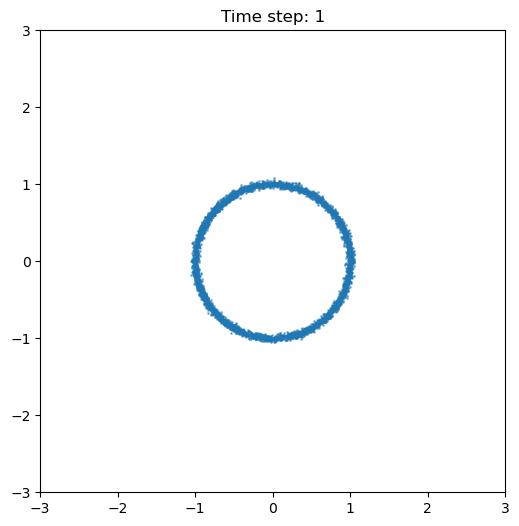

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Prepare data and parameters as before
T = 50
beta = np.linspace(1e-4, 0.02, T)
alpha = 1 - beta
x_t_list = []
t = 0
x_t = x0

# Store each step for animation
while t < T:
    eps = np.random.randn(*x_t.shape)
    x_t = np.sqrt(alpha[t]) * x_t + np.sqrt(1 - alpha[t]) * eps
    x_t_list.append(x_t.copy())
    t += 1

# Animation function
fig, ax = plt.subplots(figsize=(6,6))
def animate(i):
    ax.clear()
    ax.scatter(x_t_list[i][:,0], x_t_list[i][:,1], alpha=0.5, s=1)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(f'Time step: {i+1}')

ani = FuncAnimation(fig, animate, frames=T, interval=100)
ani.save('diffusion_process.gif', writer='imagemagick')


MovieWriter imagemagick unavailable; using Pillow instead.


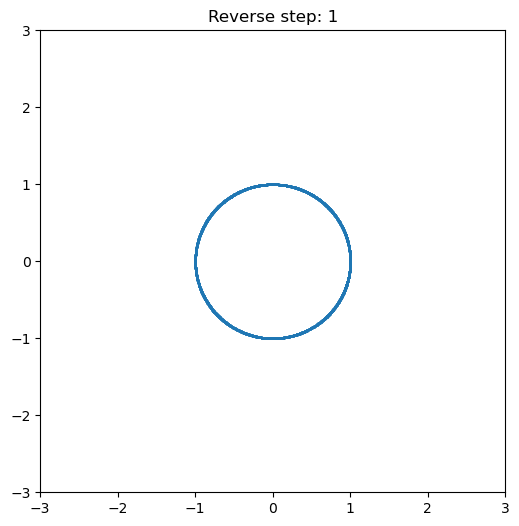

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Start from pure noise
x_rev_list = []
x_t = np.random.randn(*x0.shape)

# Reverse diffusion steps
for t in reversed(range(T)):
    x_t = x_t / np.sqrt(alpha[t])
    # Project to the corresponding forward step
    projected = x_t_list[t]
    weight = (T - t) / T
    x_t = (1 - weight) * x_t + weight * projected
    x_rev_list.append(x_t.copy())

# Animation function for reverse process
fig, ax = plt.subplots(figsize=(6,6))
def animate_rev(i):
    ax.clear()
    ax.scatter(x_rev_list[i][:,0], x_rev_list[i][:,1], alpha=0.5, s=1)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(f'Reverse step: {T-i}')

ani_rev = FuncAnimation(fig, animate_rev, frames=T, interval=100)
ani_rev.save('reverse_diffusion_process.gif', writer='imagemagick')
plt.show()

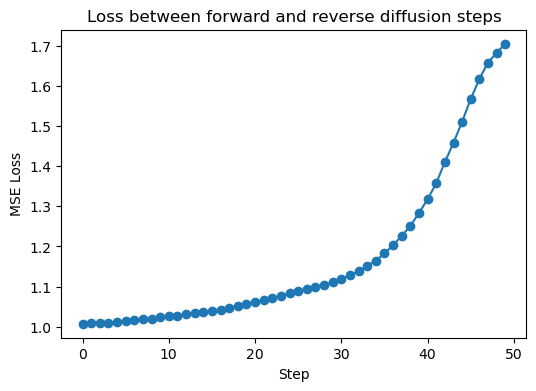

In [80]:
import numpy as np

# Compute MSE loss at each step
losses = []
for xt, xrev in zip(x_t_list, reversed(x_rev_list)):
    loss = np.mean((xt - xrev)**2)
    losses.append(loss)

# Plot the loss over steps
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(losses, marker='o')
plt.xlabel('Step')
plt.ylabel('MSE Loss')
plt.title('Loss between forward and reverse diffusion steps')
plt.show()